In [210]:
from metaflow import Flow
import pandas as pd
import os
import matplotlib.pyplot as plt

In [323]:
from metaflow import Metaflow

model_run = Flow('TrainModels').latest_run
data_run = Flow('PreprocessData').latest_run

In [324]:
data_artifacts = data_run['data_processing_split'].task.data
model_artifacts = model_run['train_prophet'].task.data

In [325]:
data_df = data_artifacts.welltest_df
prophet_model_oil = model_artifacts.prophet_oilmodel
prophet_model_water = model_artifacts.prophet_watermodel
prophet_model_liqrate = model_artifacts.prophet_liqratemodel

In [326]:
data_df.columns

Index(['Data Note', 'Well Name', 'Date', 'Time', 'Choke', 'FTHP', 'FTHT',
       'FLP', 'Tsep', 'Psep', 'Pmani', 'Meter Totalizer(Bbls)', 'Meter Factor',
       'LiqRate', '%Water', '%Sediment', 'BS&W', 'OilRate',
       'DOF Plate size(inch)', 'GasDP(InchH20)', 'GasRate', 'GOR',
       'Sand(pptb)', 'Oil gravity (API)'],
      dtype='object')

In [327]:
import plotly.express as px

def prophet_forcast(prophet_model, time_period=30):
    future = prophet_model.make_future_dataframe(periods=time_period)
    forecast = prophet_model.predict(future)
    return forecast, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

def plot_output_time(df, x_name='', y_name=''):
    # Assuming your DataFrame is named df and contains "date" and "Tsep" columns
    fig = px.line(df, x=df[x_name], y=df[y_name], title='Time Series Plot')

    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text='OilRate')

    fig.show()
    
def plot_compare_predictions(actual_df, forecast, fluid_type='OilRate'):  
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(actual_df['Date'], actual_df[fluid_type], label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], color='red', label='Forecast')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgray', alpha=0.5, label='Confidence Interval')
    ax.legend(loc='upper left')
    plt.show()


In [370]:
oil_df = model_artifacts.df_oil_train
oil_df

,ds,Choke,FTHP,FTHT,FLP,Tsep,Psep,Pmani,Meter Totalizer(Bbls),Meter Factor,LiqRate,%Sediment,BS&W,DOF Plate size(inch),GasDP(InchH20),GasRate,GOR,Sand(pptb),Oil gravity (API),y
0,2017-04-11,20,525,84.0,70,80,60,65,86560.10,1.0213,209.984754,0.3,0.3,1.25,90.0,0.7166,3422.897399,0,0.00,209.354800
1,2017-04-11,20,525,84.0,70,79,60,65,86568.70,1.0213,207.571136,0.3,0.3,1.25,88.0,0.7092,3426.940829,0,47.12,206.948423
2,2017-04-12,20,525,83.0,70,78,60,65,86577.60,1.0213,214.811990,0.3,0.3,1.25,89.0,0.7140,3333.838328,0,0.00,214.167554
3,2017-04-12,20,525,83.0,70,77,60,65,86586.60,1.0213,217.225608,0.3,0.3,1.25,87.0,0.7065,3262.165474,0,0.00,216.573931
4,2017-04-12,20,525,83.0,70,76,60,65,86595.50,1.0213,214.811990,0.3,0.3,1.25,87.0,0.7072,3302.087487,0,0.00,214.167554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2021-12-13,32,1500,151.0,290,102,270,280,43197.65,1.0000,1095.944160,0.0,0.4,2.25,100.0,4.7059,4311.167822,0,0.00,1091.560383
2209,2021-12-13,32,1500,151.0,290,102,270,280,43246.02,1.0000,1099.353360,0.0,0.4,2.25,100.0,4.7109,4302.364871,0,0.00,1094.955947
2210,2021-12-13,32,1500,151.0,290,101,270,280,43294.28,1.0000,1096.853280,0.0,0.4,2.25,100.0,4.7109,4312.171339,0,0.00,1092.465867
2211,2021-12-13,32,1500,150.0,290,101,270,280,43342.57,1.0000,1097.535120,0.0,0.4,2.25,100.0,4.7109,4309.492417,0,0.00,1093.144980


In [373]:
liqrate_forcast['yhat']

0      341.251914
1      340.625719
2      178.839875
3      190.151713
4      243.142889
          ...    
225    786.995538
226    771.237909
227    796.662454
228    848.001551
229    781.231921
Name: yhat, Length: 230, dtype: float64

In [328]:
data_df['LiqRate']

0       209.984754
1       207.571136
2       214.811990
3       217.225608
4       214.811990
           ...    
2349    782.187120
2350    796.364400
2351    794.149200
2352    787.503600
2353    810.984720
Name: LiqRate, Length: 2354, dtype: float64

In [329]:
data_df['OilRate']

0       209.354800
1       206.948423
2       214.167554
3       216.573931
4       214.167554
           ...    
2349    779.840559
2350    793.975307
2351    791.766752
2352    785.141089
2353    808.551766
Name: OilRate, Length: 2354, dtype: float64

In [330]:
data_df['%Water']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2349    0.0
2350    0.0
2351    0.0
2352    0.0
2353    0.0
Name: %Water, Length: 2354, dtype: float64

In [331]:
data_df.columns

Index(['Data Note', 'Well Name', 'Date', 'Time', 'Choke', 'FTHP', 'FTHT',
       'FLP', 'Tsep', 'Psep', 'Pmani', 'Meter Totalizer(Bbls)', 'Meter Factor',
       'LiqRate', '%Water', '%Sediment', 'BS&W', 'OilRate',
       'DOF Plate size(inch)', 'GasDP(InchH20)', 'GasRate', 'GOR',
       'Sand(pptb)', 'Oil gravity (API)'],
      dtype='object')

In [332]:
plot_output_time(data_df, x_name='Date', y_name='LiqRate')

In [333]:
plot_output_time(data_df, x_name='Date', y_name='OilRate')

In [356]:
plot_output_time(data_df, x_name='Date', y_name='%Water')

In [334]:
data_df.columns

Index(['Data Note', 'Well Name', 'Date', 'Time', 'Choke', 'FTHP', 'FTHT',
       'FLP', 'Tsep', 'Psep', 'Pmani', 'Meter Totalizer(Bbls)', 'Meter Factor',
       'LiqRate', '%Water', '%Sediment', 'BS&W', 'OilRate',
       'DOF Plate size(inch)', 'GasDP(InchH20)', 'GasRate', 'GOR',
       'Sand(pptb)', 'Oil gravity (API)'],
      dtype='object')

In [374]:
months = 0
water_forcast, water_forecast_df = prophet_forcast(prophet_model_water, time_period=32*months)
oil_forcast, oil_forecast_df = prophet_forcast(prophet_model_oil, time_period=32*months)
liqrate_forcast, liqrate_forecast_df = prophet_forcast(prophet_model_liqrate, time_period=32*months)

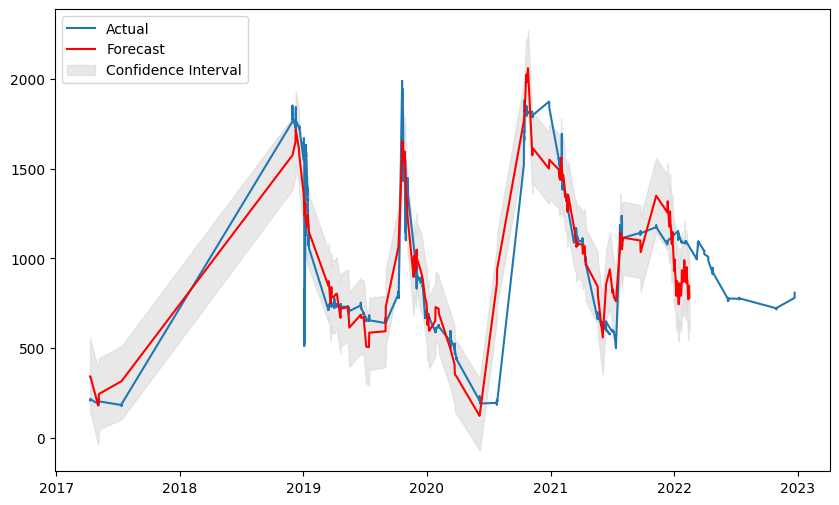

In [363]:
plot_compare_predictions(data_df, liqrate_forcast, 'OilRate')

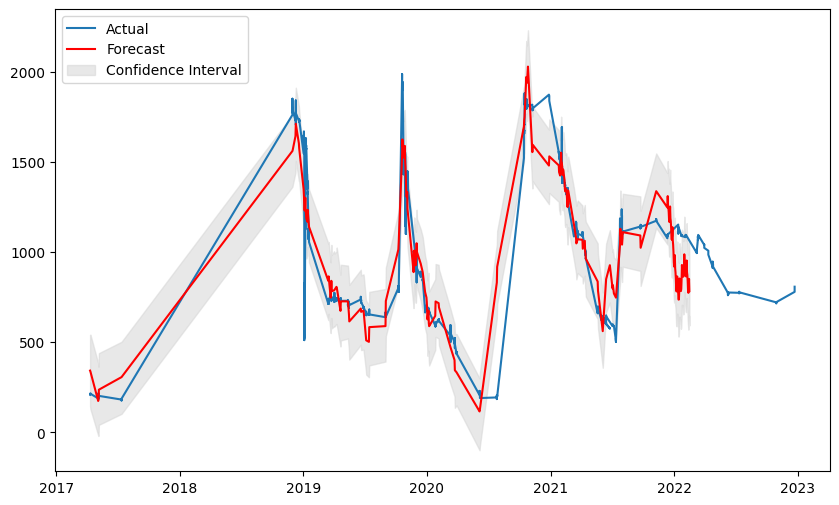

In [364]:
plot_compare_predictions(data_df, oil_forecast_df, 'OilRate')

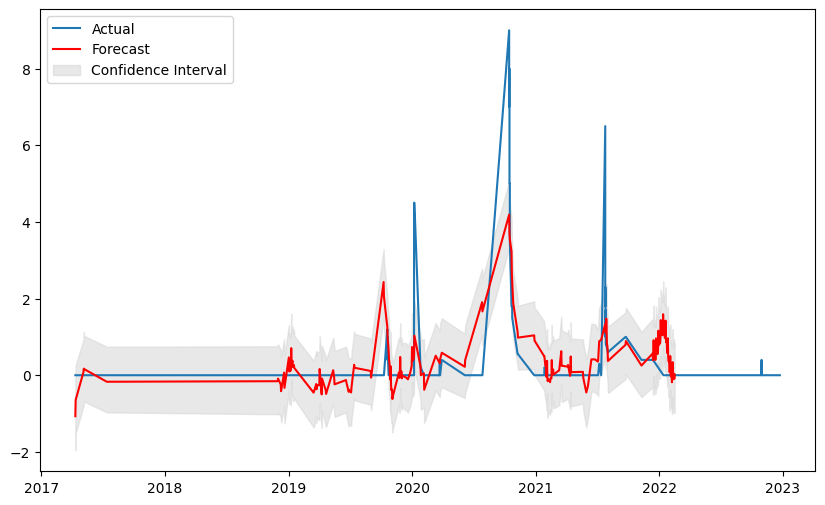

In [365]:
plot_compare_predictions(data_df, water_forecast_df, '%Water')

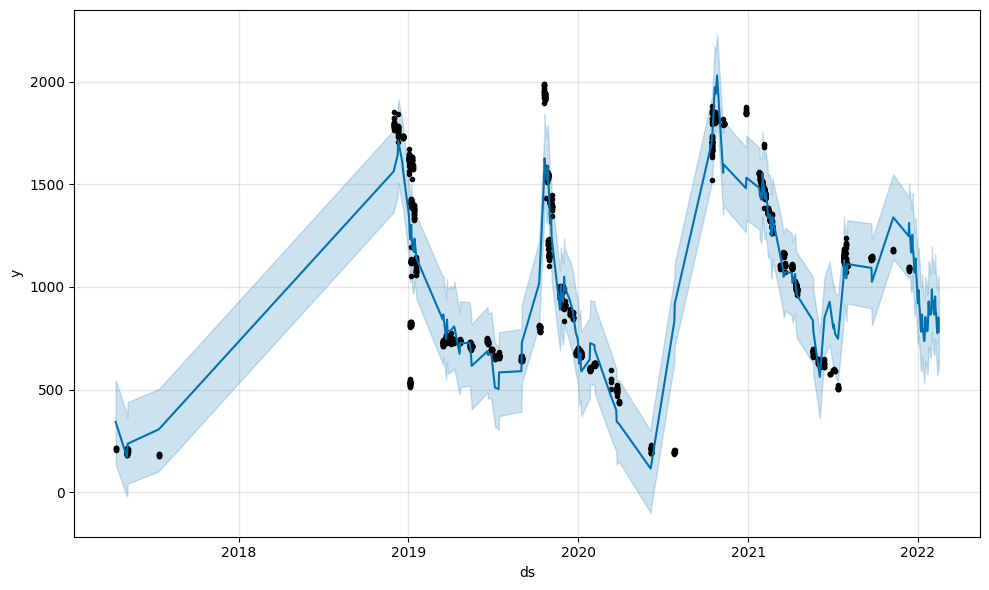

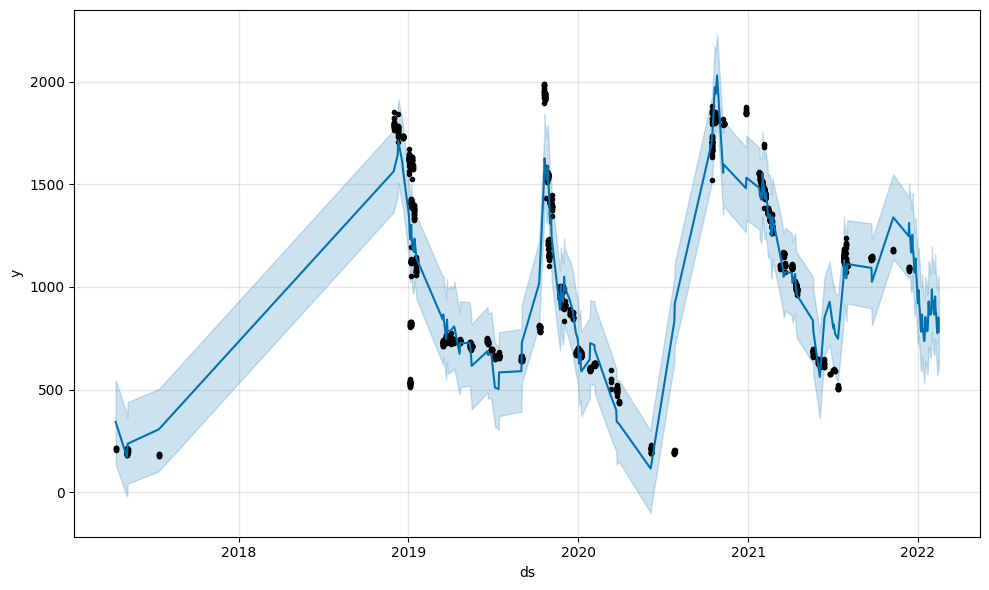

In [367]:
prophet_model_oil.plot(oil_forcast)

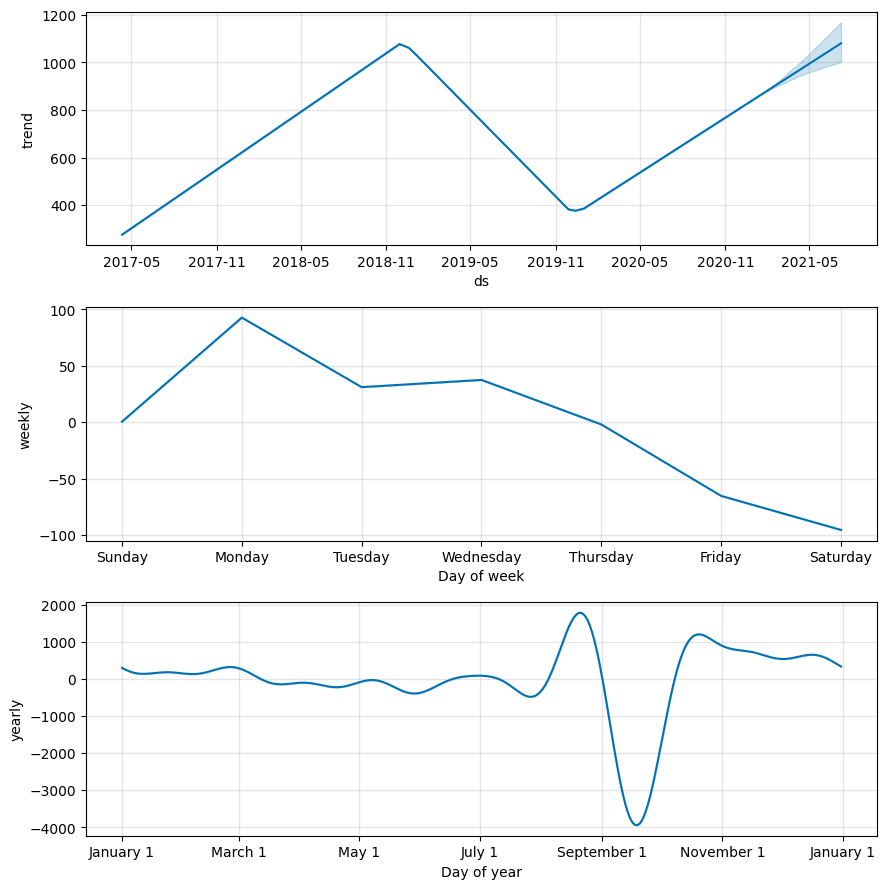

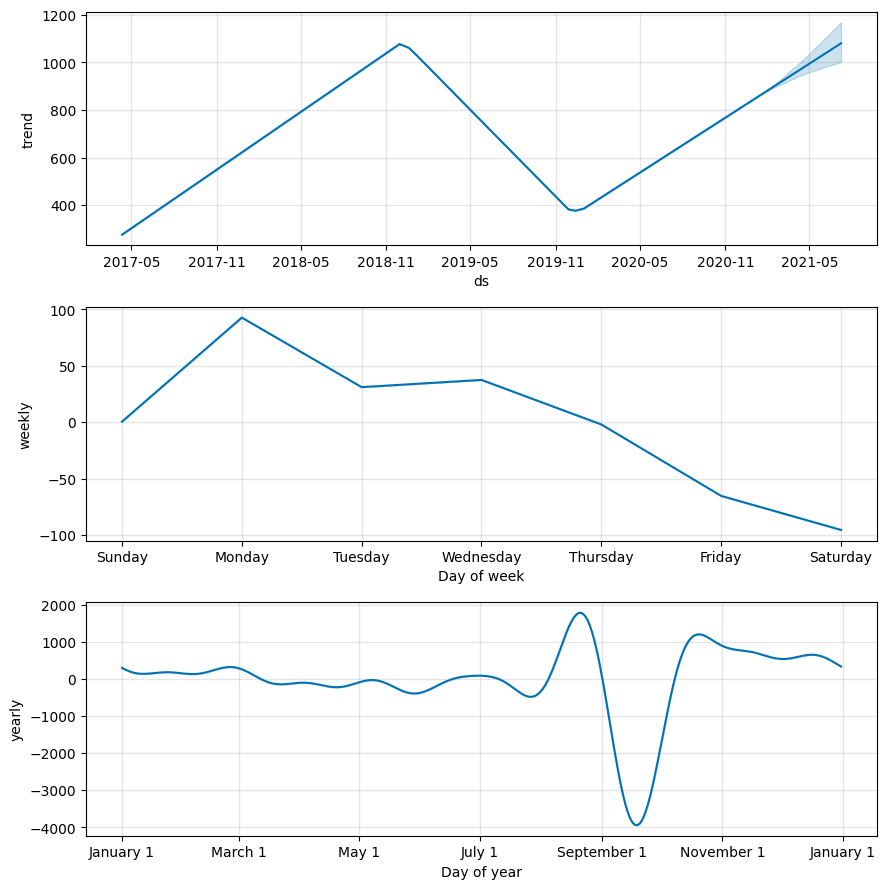

In [289]:
prophet_model_oil.plot_components(oil_forcast)

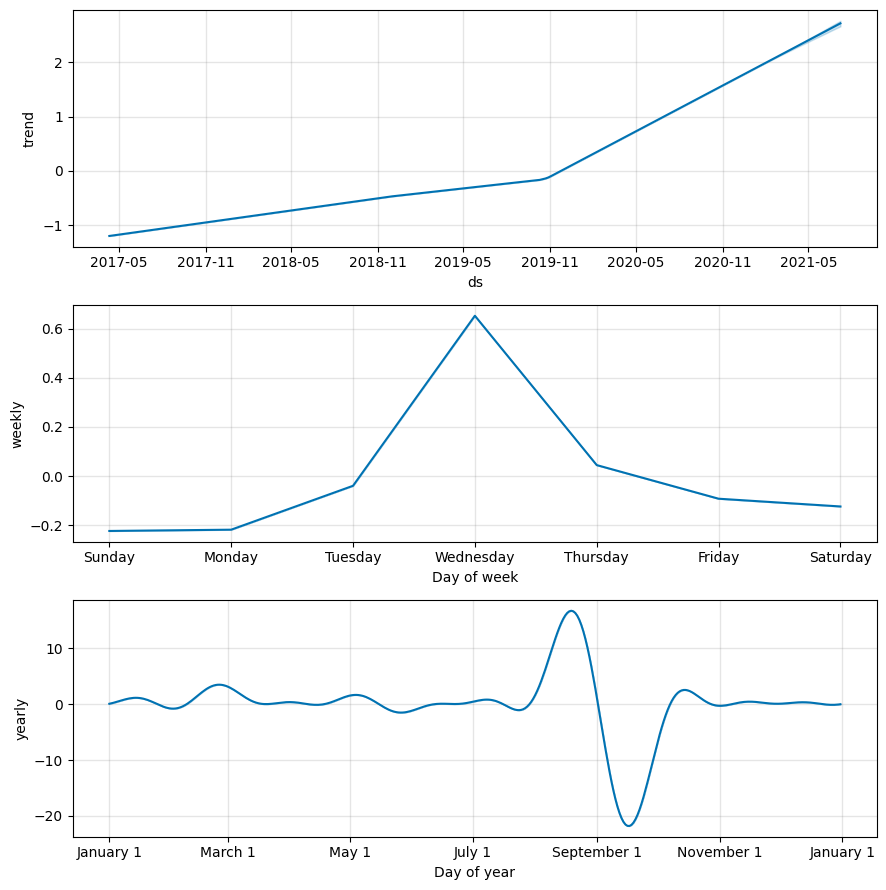

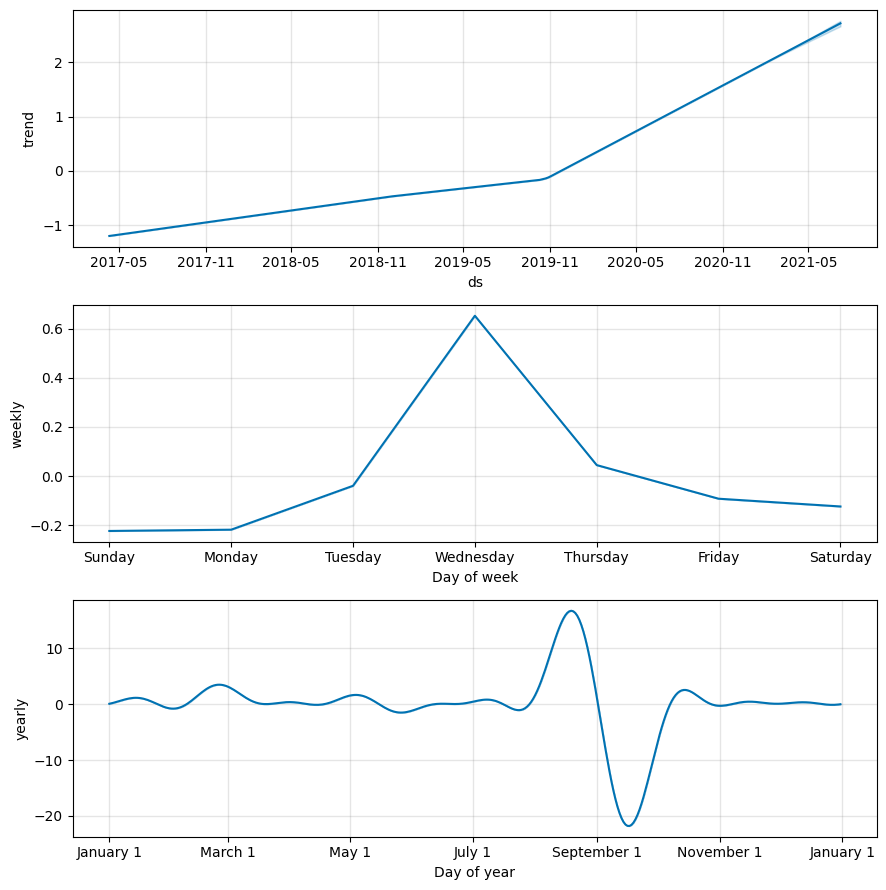

In [290]:
prophet_model_water.plot_components(water_forcast)

In [278]:
from utility import *

In [280]:
model_artifacts.df_oil_train['y']

0        209.354800
1        206.948423
2        214.167554
3        216.573931
4        214.167554
           ...     
1480    1851.934024
1481    1845.032407
1482    1854.234563
1483    1840.431328
1484    1840.431328
Name: y, Length: 1484, dtype: float64

In [284]:
model_artifacts.df_oil['y'][1484:1484+303]

1485    1555.483390
1486    1557.747558
1487    1557.521141
1488    1557.294725
1489    1557.521141
           ...     
1783    1326.123176
1784    1323.406174
1785    1329.293011
1786    1333.594930
1787    1335.632681
Name: y, Length: 303, dtype: float64

In [281]:
oil_forecast_df['yhat']

0       161.937417
1       158.207444
2       214.573463
3       192.536488
4       293.389465
          ...     
299    1168.414058
300    1256.451870
301    1188.750887
302    1186.790214
303    1136.482526
Name: yhat, Length: 304, dtype: float64

ValueError: x and y must be the same size

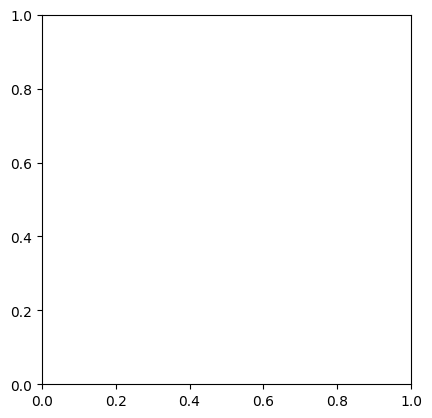

In [279]:
test_fit_plot(model_artifacts.df_oil_train['y'], oil_forecast_df['yhat'])

In [263]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(oil_forecast_df)
df_performance

KeyError: 'cutoff'

In [80]:
from utility import standardize_column_names

In [3]:
def test_model(select_model, test_data):
    from metaflow import Flow
    run = Flow('WellTestTrain').latest_run

    if select_model == 'RandomForest':
        model_artifact = run[select_model].task.data.regr
    elif select_model == 'XGBoost':
        model_artifact = run[select_model].task.data.regr
        
    prediction = model_artifact.predict(test_data)
    return prediction
    


'/home/tegbe/2023 dev projects/well-test'

In [21]:
path_inhouse = 'data_set/INHOUSE DATA/7SS Well x Inhouse Data.xlsx'
path_mer = '/home/tegbe/2023 dev projects/well-test/data_set/MER DATA/7SS Well x MER Data.xlsx'
path_test = '/home/tegbe/2023 dev projects/well-test/data_set/test/Well 1 x Inhouse Data.xlsx'

well_test_data_inhouse = pd.read_excel(path_inhouse, header=1)
well_test_data_mer = pd.read_excel(path_mer, header=1)
well_test_data_test = pd.read_excel(path_test, header=1)

well_test_data_inhouse.shape, well_test_data_mer.shape, well_test_data_test.shape

((1462, 24), (367, 23), (1599, 24))

In [22]:
well_test_data_inhouse.columns

Index(['Data Note', 'Well Name', 'Date', 'Time', 'Choke', 'FTHP', 'FTHT',
       'FLP', 'Tsep', 'Psep', 'Pmani', 'Meter Totalizer(Bbls)', 'Meter Factor',
       'LiqRate', '%Water', '%Sediment', 'BS&W', 'OilRate',
       'DOF Plate size(inch)', 'GasDP(InchH20)', 'GasRate', 'GOR',
       'Sand(pptb)', 'Oil gravity (API)'],
      dtype='object')

In [23]:
well_test_data_mer.columns

Index(['Well Name', 'Test date', 'Time', 'Choke size(/64)', 'FTHP(psig)',
       'FTHT(T)', 'FLP(psig)', 'Tsep(degF)', 'Psep(psig)',
       'Manifold Pressure(psig)', 'Meter Totalizer(Bbls)', 'Meter Factor',
       'Liquid rate(BLPD)', '%Water', '%Sediment', 'BS&W(%)',
       'Oil rate (BOPD)', 'DOF Plate size(inch)', 'GasDP(InchH20)',
       'Gas rate(Mmscf/d)', 'GOR(scf/bbl)', 'Sand(pptb)', 'Oil gravity (API)'],
      dtype='object')

In [24]:
well_test_data_test.columns

Index(['Data Note', 'Well Name', 'Date', 'Time', 'Choke', 'FTHP', 'FTHT',
       'FLP', 'Tsep', 'Psep', 'Pmani', 'Meter Totalizer(Bbls)', 'Meter Factor',
       'LiqRate', '%Water', '%Sediment', 'BS&W', 'OilRate',
       'DOF Plate size(inch)', 'GasDP(InchH20)', 'GasRate', 'GOR',
       'Sand(pptb)', 'Oil gravity (API)'],
      dtype='object')

In [30]:
import pandas as pd


def standardize_column_names(df):
    
    preferred_columns = [
        'Data Note', 'Well Name', 'Date', 'Time', 'Choke', 'FTHP', 'FTHT', 'FLP', 'Tsep', 'Psep',
        'Pmani', 'Meter Totalizer(Bbls)', 'Meter Factor', 'LiqRate', '%Water', '%Sediment',
        'BS&W', 'OilRate', 'DOF Plate size(inch)', 'GasDP(InchH20)', 'GasRate', 'GOR',
        'Sand(pptb)', 'Oil gravity (API)'
    ]

    existing_columns = df.columns.tolist()

    column_mapping = {}
    for i, existing_column in enumerate(existing_columns):
        if existing_column in preferred_columns:
            column_mapping[existing_column] = preferred_columns[i]
        else:
            column_mapping[existing_column] = None

    df.rename(columns=column_mapping, inplace=True)
    df = df[preferred_columns]

    return df

df1 = pd.read_excel(path_test, header=1)
df1 = standardize_column_names(df1)
df1

,Data Note,Well Name,Date,Time,Choke,FTHP,FTHT,FLP,Tsep,Psep,...,%Water,%Sediment,BS&W,OilRate,DOF Plate size(inch),GasDP(InchH20),GasRate,GOR,Sand(pptb),Oil gravity (API)
0,NaN,1,2017-07-08,10:30:00,28,1760,122.0,290,87,255,...,0.0,0.3,0.3,2116.536512,2.00,102.0,3.79100,1791.133760,0,0.00
1,NaN,1,2017-07-08,11:30:00,28,1760,122.0,290,89,255,...,0.0,0.3,0.3,2121.346822,2.00,101.0,3.76400,1774.344469,0,0.00
2,NaN,1,2017-07-08,12:30:00,28,1760,122.0,290,92,255,...,0.0,0.4,0.4,2114.413607,2.00,100.0,3.73300,1765.501314,0,43.74
3,NaN,1,2017-07-08,13:30:00,28,1760,126.0,290,93,255,...,0.0,0.4,0.4,2114.413607,2.00,103.0,3.78500,1790.094421,0,0.00
4,NaN,1,2017-07-08,14:30:00,28,1760,126.0,290,94,255,...,0.0,0.3,0.3,2116.536512,2.00,103.0,3.78100,1786.409060,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,NaN,1,2022-12-24,22:00:00,20,750,92.0,110,82,100,...,0.0,0.3,0.3,622.609431,1.25,63.0,0.69170,1110.969358,0,44.88
1595,NaN,1,2022-12-24,23:00:00,20,730,92.0,110,82,100,...,0.0,0.3,0.3,625.976101,1.25,66.0,0.70815,1131.273221,0,0.00
1596,NaN,1,2022-12-25,1900-01-01 00:00:00,20,730,92.0,110,78,100,...,0.0,0.3,0.3,641.238336,1.25,66.0,0.71100,1108.792097,0,0.00
1597,NaN,1,2022-12-25,1900-01-01 01:00:00,20,720,92.0,110,76,100,...,0.0,0.3,0.3,656.500572,1.25,66.0,0.71240,1085.147569,0,44.88


In [46]:
from metaflow import Flow


def export_model(model_name='train_rf_or', var='regr'):
    run = Flow('WellTestTrain').latest_run
    if var == 'regr':
        model_artifact = run[model_name].task.data.regr
    else:
        model_artifact = run[model_name].task.data.xgb
    
    X_test = run[model_name].task.data.X_test_transformed
    y_test_or = run[model_name].task.data.y_test_or
    y_test_water = run[model_name].task.data.y_test_water

    return (model_artifact, X_test, y_test_or,  y_test_water
)

rf_oilrate_model, X_test, y_test_or, y_test_water = export_model(model_name='train_rf_or')
xgb_oilrate_model = export_model(model_name='train_xgb_or', var='')[0]
rf_water_model = export_model(model_name='train_rf_water')[0]
xgb_water_model = export_model(model_name='train_xgb_water', var='')[0]

In [49]:
y_test_water

810     0.0
1361    0.0
1104    0.0
2251    0.0
1107    0.0
       ... 
1594    0.0
1700    0.0
325     0.0
1835    0.0
375     0.0
Name: %Water, Length: 471, dtype: float64

In [43]:
test_predictions_xgb_or = xgb_oilrate_model.predict(X_test)
test_predictions_rf_or = rf_oilrate_model.predict(X_test)

test_predictions_xgb_water = xgb_water_model.predict(X_test)
test_predictions_rf_water = rf_water_model.predict(X_test)


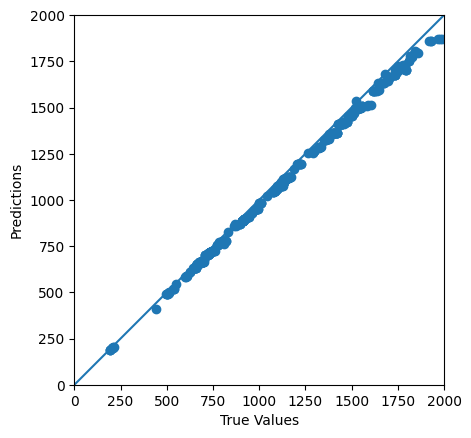

In [58]:
test_fit_plot(y_test_or, test_predictions_xgb_or)

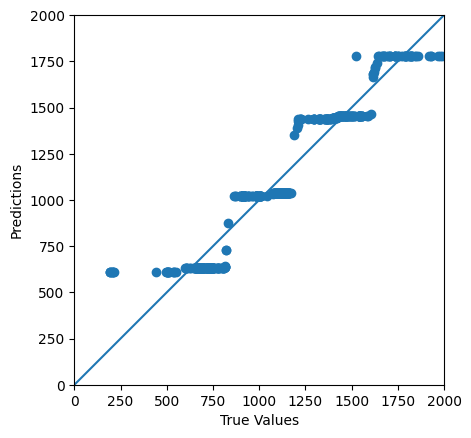

In [59]:
test_fit_plot(y_test_or, test_predictions_rf_or)

In [60]:
#test_fit_plot(y_test_water, test_predictions_xgb_water)

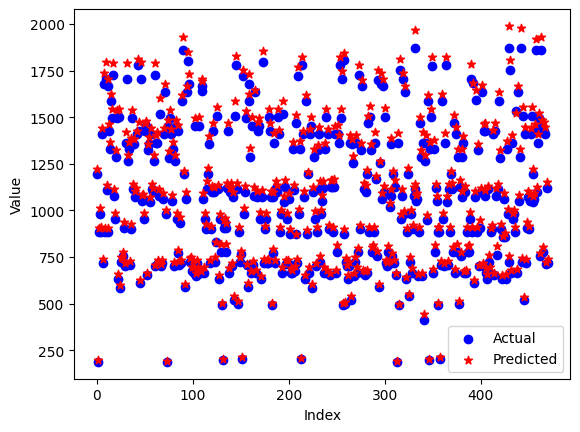

In [61]:
plot_compare_prediction(test_predictions=test_predictions_xgb_or, test_labels=y_test_or)

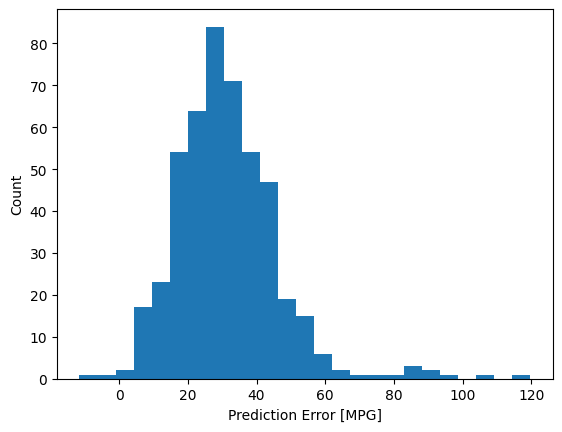

In [62]:
  
    
error_hist(test_predictions_xgb_or, y_test_or)

In [25]:
# data_path = '/home/tegbe/2023 dev projects/well-test/data_set/INHOUSE DATA/Well 4SS x Inhouse Data.xlsx'
# well_test_data_inhouse = pd.read_excel(data_path, header=1)
# test_sample = well_test_data_inhouse.iloc[10]
# test_sample

In [26]:
# data_artifact.xgb_r.predict(test_sample)

In [132]:
import numpy as np

baseline_prediction = np.mean(data_artifact.y_train)
baseline_prediction

15000.80993650852

In [134]:
# Create an array of baseline predictions with the same length as y_test
baseline_predictions = np.full_like(data_artifact.y_test, baseline_prediction)

In [3]:
np.log1p(32)

3.4965075614664802

In [ ]:
from metaflow import Metaflow

In [125]:
from metaflow import Metaflow
flow = list(Metaflow())[1]
run = flow.latest_run

data_artifact = run['join_models'].task.data
#well_data = data_artifact.welltest_df

In [127]:
data_artifact.r2_scores

[0.7440913347364435, 0.9080398178083317]

In [107]:
welltest_dnc = well_data.dropna(axis=1)
welltest_dnr = welltest_dnc.dropna(axis=0)
welltest_dnr[welltest_dnr.isna().any(axis=1)]

,Well Name,Date,Time,Choke,FTHP,FTHT,FLP,Tsep,Psep,Pmani,Meter Totalizer(Bbls),Meter Factor,LiqRate,%Water,%Sediment,BS&W,OilRate


In [ ]:
data_artifact.X_temp

In [115]:
data_artifact.X_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Choke                  995 non-null    int64  
 1   FTHP                   995 non-null    int64  
 2   FTHT                   995 non-null    float64
 3   FLP                    995 non-null    int64  
 4   Tsep                   995 non-null    int64  
 5   Psep                   993 non-null    float64
 6   Pmani                  995 non-null    int64  
 7   Meter Totalizer(Bbls)  995 non-null    float64
 8   Meter Factor           995 non-null    float64
 9   LiqRate                995 non-null    float64
 10  %Water                 995 non-null    float64
 11  %Sediment              995 non-null    int64  
 12  BS&W                   995 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 101.2 KB


In [122]:
data_artifact.X.shape, data_artifact.y.shape

((993, 13), (993, 1))

In [121]:
X_data = data_artifact.X
X_data[X_data.isna().any(axis=1)]

,Choke,FTHP,FTHT,FLP,Tsep,Psep,Pmani,Meter Totalizer(Bbls),Meter Factor,LiqRate,%Water,%Sediment,BS&W


In [112]:
data_artifact.X_temp.isna().any(axis=0)

Choke                    False
FTHP                     False
FTHT                     False
FLP                      False
Tsep                     False
Psep                     False
Pmani                    False
Meter Totalizer(Bbls)    False
Meter Factor             False
LiqRate                  False
%Water                   False
%Sediment                False
BS&W                     False
dtype: bool

In [120]:
test = data_artifact.X
test.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [46]:
X_data_new = X_data.dropna(axis=0)
X_data_new[X_data_new.isna().any(axis=1)]

,Choke,FTHP,FTHT,FLP,Tsep,Psep,Pmani,Meter Totalizer(Bbls),Meter Factor,LiqRate,%Water,%Sediment,BS&W


In [76]:
data_artifact.y

,OilRate
0,18113.149424
1,17742.576447
2,17849.214097
3,17643.672119
4,17318.139906
...,...
990,2429.198306
991,2413.889623
992,2372.610742
993,2409.639109


In [120]:
train_x[rem_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 909 to 102
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FTHT                   796 non-null    float64
 1   Psep                   796 non-null    object 
 2   Meter Totalizer(Bbls)  796 non-null    float64
 3   Meter Factor           796 non-null    float64
 4   %Water                 796 non-null    float64
 5   BS&W                   796 non-null    float64
 6   OilRate                796 non-null    float64
dtypes: float64(6), object(1)
memory usage: 49.8+ KB


In [130]:
train_x[rem_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 909 to 102
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FTHT                   796 non-null    float64
 1   Psep                   796 non-null    object 
 2   Meter Totalizer(Bbls)  796 non-null    float64
 3   Meter Factor           796 non-null    float64
 4   %Water                 796 non-null    float64
 5   BS&W                   796 non-null    float64
 6   OilRate                796 non-null    float64
dtypes: float64(6), object(1)
memory usage: 49.8+ KB


In [135]:
import pandas as pd

In [137]:
train_x = train_x.apply(pd.to_numeric, errors='coerce')

In [138]:
rem_columns = train_x.select_dtypes(include=['object']).columns
train_x[rem_columns] = train_x[rem_columns].astype(float)
train_x

,Choke,FTHP,FTHT,FLP,Tsep,Psep,Pmani,Meter Totalizer(Bbls),Meter Factor,%Water,%Sediment,BS&W,OilRate
909,12,950,83.0,76,73,60.0,65,181.252800,0.03,1.00,116,0.5239,2891.305498
925,12,1250,86.0,82,75,60.0,65,192.304800,0.03,1.00,128,0.5499,2860.381122
974,10,1540,94.0,86,90,75.0,80,190.536480,24.00,1.00,65,0.3850,2658.697943
765,12,1090,90.0,300,84,270.0,280,59.015951,0.40,1.00,102,0.9373,15945.930441
911,12,950,83.0,76,74,60.0,65,158.706720,0.03,1.00,118,0.5280,3327.889629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,20,2950,115.0,400,74,255.0,265,351.682455,18.00,2.50,81,5.4335,18841.484482
270,20,2900,114.0,440,75,255.0,265,391.123521,9.00,2.25,131,5.7410,16129.920251
860,12,1260,88.9,105,92,90.0,100,90.680528,0.45,1.25,104,0.8368,9269.714654
435,20,2975,111.0,500,70,315.0,330,354.042178,7.00,2.50,66,5.4850,16658.606888


In [ ]:
columns

In [139]:
# convert float to int type
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 909 to 102
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Choke                  796 non-null    int64  
 1   FTHP                   796 non-null    int64  
 2   FTHT                   796 non-null    float64
 3   FLP                    796 non-null    int64  
 4   Tsep                   796 non-null    int64  
 5   Psep                   794 non-null    float64
 6   Pmani                  796 non-null    int64  
 7   Meter Totalizer(Bbls)  796 non-null    float64
 8   Meter Factor           796 non-null    float64
 9   %Water                 796 non-null    float64
 10  %Sediment              796 non-null    int64  
 11  BS&W                   796 non-null    float64
 12  OilRate                796 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 87.1 KB
